In [1]:
import pandas as pd
from collections import defaultdict, Counter

In [2]:
before_df = pd.read_csv(r'D:\다운로드\before.csv')
after_df = pd.read_csv(r'D:\다운로드\after.csv')
example_df = pd.read_csv(r'D:\다운로드\example.csv')

In [3]:
# 결과 출력
print("학생이 이해하지 못할 가능성이 높은 knowledgeTag:")
for tag, prob in sorted_probabilities[:]:  # 상위 10개만 출력
    print(f"knowledgeTag: {tag}, Probability: {prob}")

학생이 이해하지 못할 가능성이 높은 knowledgeTag:


NameError: name 'sorted_probabilities' is not defined

In [4]:
# 베이즈 네트워크 초기화
bayesian_network = defaultdict(list)

# 'before.csv' 데이터를 기반으로 네트워크 구성
for _, row in before_df.iterrows():
    bayesian_network[row['to_id']].append(row['knowledgeTag'])

# 초기 확률 설정 (모든 개념을 0.5로 시작)
initial_probabilities = {tag: 0.5 for tag in before_df['knowledgeTag'].unique()}

# 틀린 문제 필터링
incorrect_answers = example_df[example_df['answerCode'] == 0]
incorrect_knowledge_tags = incorrect_answers['knowledgeTag'].unique()

# 각 개념의 연결 수 계산
connection_counts = before_df['knowledgeTag'].value_counts()

In [5]:
# IRT 수치를 활용하여 확률을 업데이트하는 함수
def update_probabilities_with_irt(network, initial_probs, example_df, connection_counts):
    updated_probs = initial_probs.copy()
    
    for _, row in example_df.iterrows():
        knowledge_tag = row['knowledgeTag']
        if row['answerCode'] == 0:  # 학생이 문제를 틀린 경우
            if knowledge_tag in network:
                for prerequisite in network[knowledge_tag]:
                    weight = connection_counts.get(prerequisite, 1)
                    difficulty_factor = 1 / (1 + abs(row['difficultyLevel']))  # 난이도 기반 가중치
                    discrimination_factor = row['discriminationLevel']  # 변별도 기반 가중치
                    guess_factor = row['guessLevel']  # 추측도 기반 가중치
                    
                    # IRT 요인을 결합하여 확률 업데이트
                    updated_probs[prerequisite] *= (0.5 ** weight) * difficulty_factor * discrimination_factor * guess_factor
    return updated_probs

In [6]:
# IRT를 고려하여 확률 업데이트
updated_probabilities = update_probabilities_with_irt(
    bayesian_network, initial_probabilities, example_df, connection_counts)

# 확률을 1에서 100%로 변환
percent_probabilities = {tag: (1 - prob) * 100 for tag, prob in updated_probabilities.items()}

# 확률이 높은 순서로 정렬하여 이해하지 못할 가능성이 높은 개념을 찾음
sorted_percent_probabilities = sorted(percent_probabilities.items(), key=lambda x: x[1], reverse=True)


In [7]:
# 결과 출력
print("학생이 이해하지 못할 가능성이 높은 knowledgeTag (1에서 100%로 변환):")
for tag, prob in sorted_percent_probabilities[:]:  # 상위 10개만 출력
    print(f"knowledgeTag: {tag}, Probability: {prob:.2f}%")

학생이 이해하지 못할 가능성이 높은 knowledgeTag (1에서 100%로 변환):
knowledgeTag: 2068, Probability: 100.00%
knowledgeTag: 2107, Probability: 100.00%
knowledgeTag: 2108, Probability: 100.00%
knowledgeTag: 10399, Probability: 100.00%
knowledgeTag: 8481, Probability: 100.00%
knowledgeTag: 365, Probability: 100.00%
knowledgeTag: 439, Probability: 100.00%
knowledgeTag: 443, Probability: 100.00%
knowledgeTag: 452, Probability: 100.00%
knowledgeTag: 458, Probability: 100.00%
knowledgeTag: 464, Probability: 100.00%
knowledgeTag: 549, Probability: 100.00%
knowledgeTag: 554, Probability: 100.00%
knowledgeTag: 2119, Probability: 100.00%
knowledgeTag: 5269, Probability: 100.00%
knowledgeTag: 5270, Probability: 100.00%
knowledgeTag: 5271, Probability: 100.00%
knowledgeTag: 2120, Probability: 100.00%
knowledgeTag: 7691, Probability: 100.00%
knowledgeTag: 7782, Probability: 100.00%
knowledgeTag: 7823, Probability: 100.00%
knowledgeTag: 3728, Probability: 100.00%
knowledgeTag: 1935, Probability: 100.00%
knowledgeTag: 1

In [8]:
# 선수 개념 딕셔너리 생성
prerequisite_dict = defaultdict(list)
for _, row in before_df.iterrows():
    prerequisite_dict[row['to_id']].append(row['knowledgeTag'])

# 학생이 틀린 문제 필터링
incorrect_answers = example_df[example_df['answerCode'] == 0]

# 틀린 문제의 개념 추출
incorrect_knowledge_tags = incorrect_answers['knowledgeTag'].tolist()

# 선수 개념 찾기
all_prerequisites = []
for tag in incorrect_knowledge_tags:
    all_prerequisites.extend(prerequisite_dict[tag])

# 선수 개념의 빈도 계산
prerequisite_counts = Counter(all_prerequisites)

# 가장 많이 연관된 선수 개념 찾기
most_common_prerequisite = prerequisite_counts.most_common(1)

# 결과 출력
if most_common_prerequisite:
    tag, count = most_common_prerequisite[0]
    print(f"학생이 가장 모를 가능성이 높은 선수 개념 (knowledgeTag): {tag}, 관련된 틀린 문제 수: {count}")
else:
    print("선수 개념을 찾을 수 없습니다.")

학생이 가장 모를 가능성이 높은 선수 개념 (knowledgeTag): 7823, 관련된 틀린 문제 수: 11


In [9]:
import matplotlib.pyplot as plt
import networkx as nx

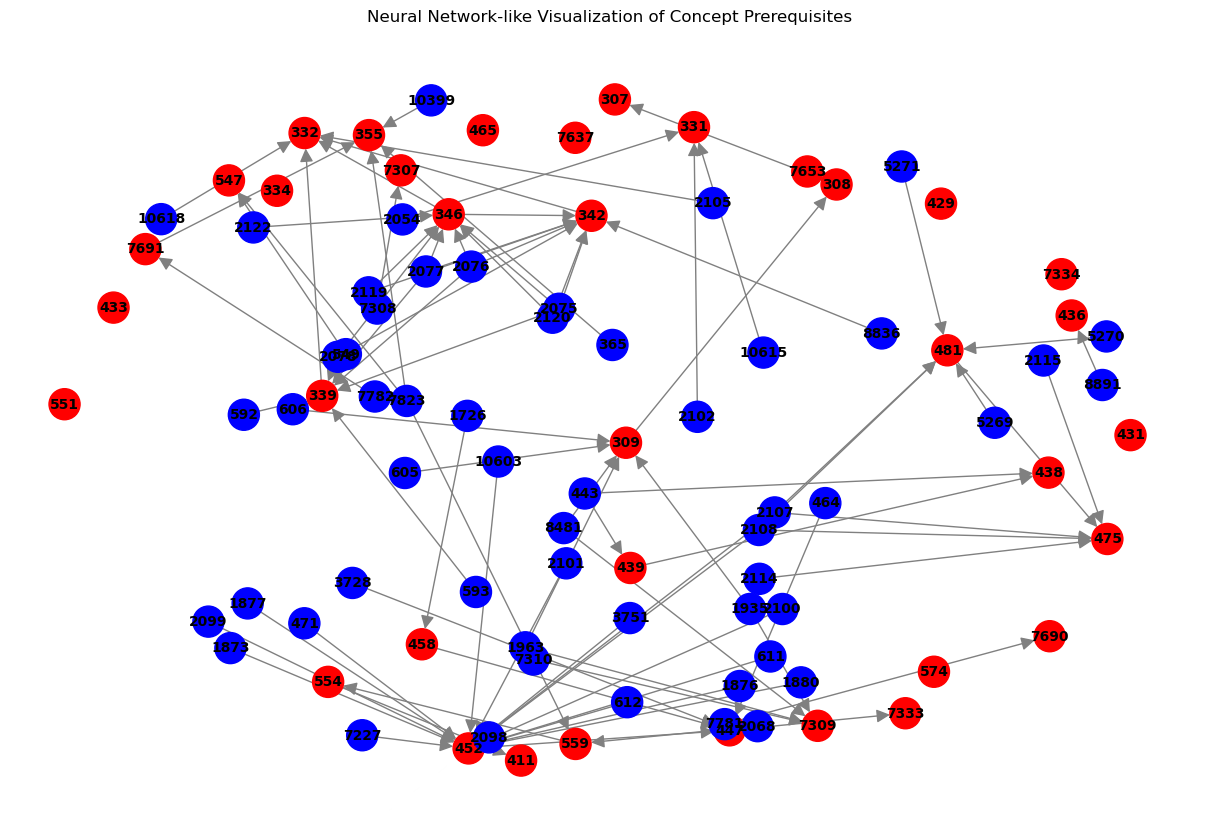

In [10]:
# 선수 개념의 빈도 계산
prerequisite_counts = Counter(all_prerequisites)

# NetworkX 그래프 생성
G = nx.DiGraph()

# 노드와 엣지 추가
for tag in incorrect_knowledge_tags:
    G.add_node(tag, color='red')  # 틀린 문제의 개념을 빨간색 노드로 추가
    for prerequisite in prerequisite_dict[tag]:
        G.add_node(prerequisite, color='blue')  # 선수 개념을 파란색 노드로 추가
        G.add_edge(prerequisite, tag)  # 선수 개념에서 틀린 문제의 개념으로 엣지 추가

# 노드 색상 설정
node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]

# 그래프 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # 그래프 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title('Neural Network-like Visualization of Concept Prerequisites')
plt.show()

In [11]:
# 선수 개념 딕셔너리 생성
prerequisite_dict = defaultdict(list)
for _, row in before_df.iterrows():
    prerequisite_dict[row['to_id']].append(row['knowledgeTag'])

# 학생이 틀린 문제 필터링
incorrect_answers = example_df[example_df['answerCode'] == 0]

# 틀린 문제의 개념 추출
incorrect_knowledge_tags = incorrect_answers['knowledgeTag'].tolist()

# 틀린 문제의 선수 개념 추출
incorrect_prerequisites = set()
for tag in incorrect_knowledge_tags:
    incorrect_prerequisites.update(prerequisite_dict[tag])

In [12]:
# 학생이 맞은 문제 필터링
correct_answers = example_df[example_df['answerCode'] == 1]

# 맞은 문제의 개념 추출
correct_knowledge_tags = correct_answers['knowledgeTag'].tolist()

# 맞은 문제의 선수 개념 추출
correct_prerequisites = set()
for tag in correct_knowledge_tags:
    correct_prerequisites.update(prerequisite_dict[tag])

# 틀린 문제의 선수 개념에서 맞은 문제의 선수 개념을 제외
final_prerequisites = incorrect_prerequisites - correct_prerequisites

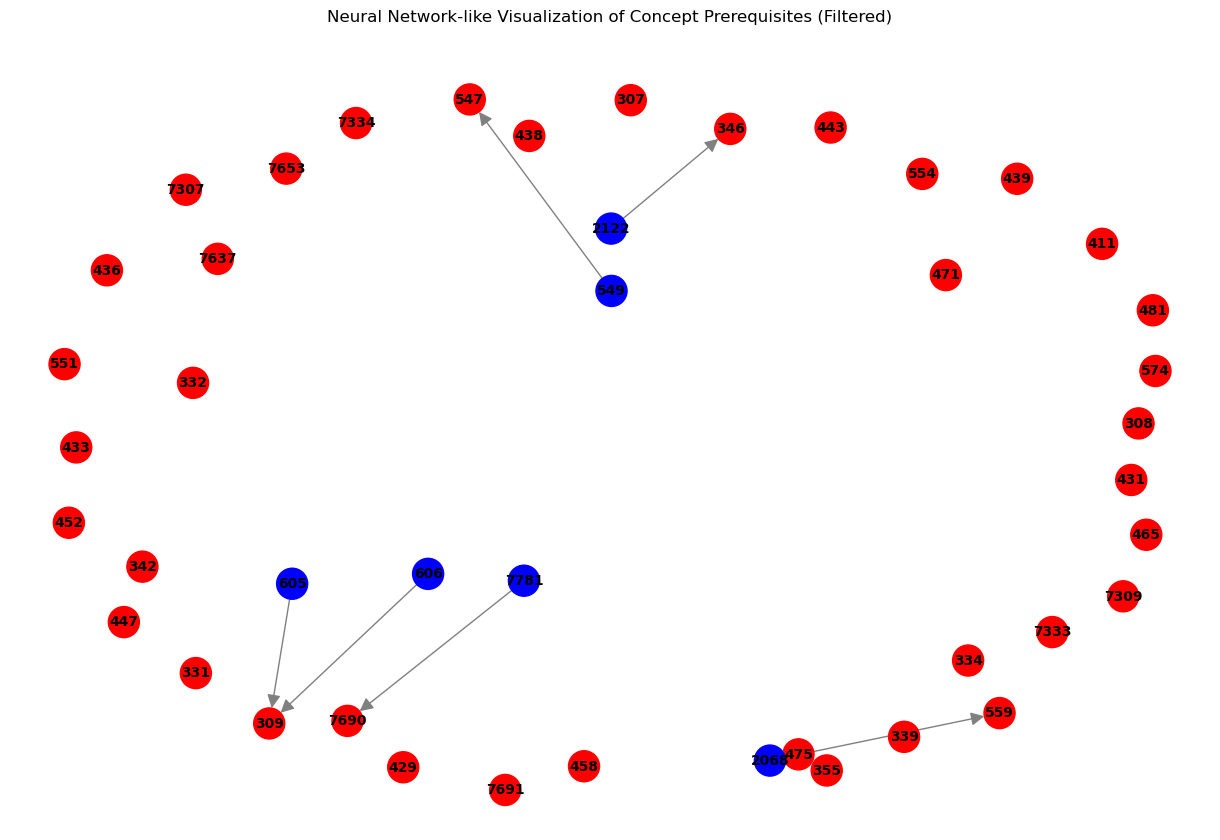

In [13]:
# 시각화: 결과를 그래프로 표현
G = nx.DiGraph()

# 노드 및 엣지 추가
for tag in incorrect_knowledge_tags:
    G.add_node(tag, color='red')  # 틀린 문제의 개념
    for prerequisite in prerequisite_dict[tag]:
        if prerequisite in final_prerequisites:
            G.add_node(prerequisite, color='blue')  # 남은 선수 개념
            G.add_edge(prerequisite, tag)  # 엣지 추가

# 노드 색상 설정
node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]

# 그래프 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title('Neural Network-like Visualization of Concept Prerequisites (Filtered)')
plt.show()

In [14]:
final_prerequisites

{549, 605, 606, 2068, 2122, 7781}

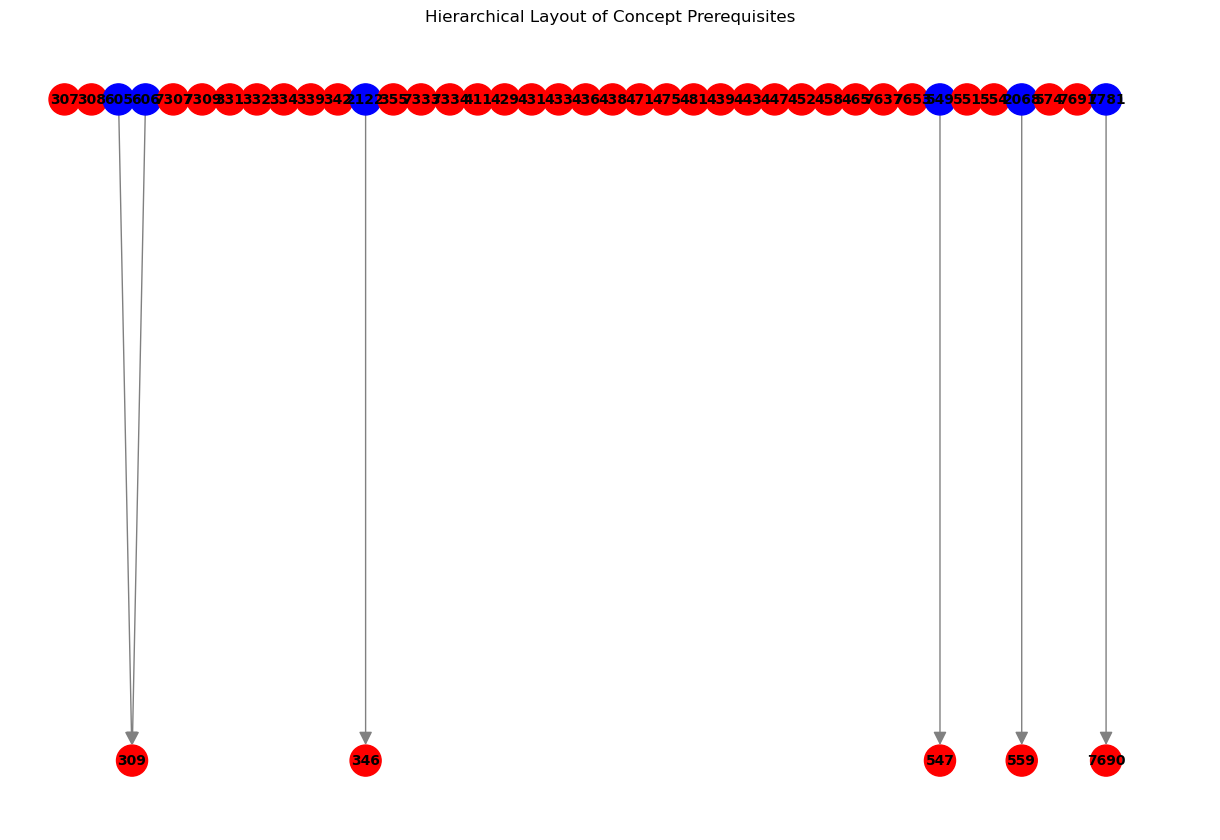

In [15]:
# 계층형 그래프 시각화 준비
G = nx.DiGraph()
# 노드 및 엣지 추가
for tag in incorrect_knowledge_tags:
    G.add_node(tag, color='red')  # 틀린 문제의 개념
    for prerequisite in prerequisite_dict[tag]:
        if prerequisite in final_prerequisites:
            G.add_node(prerequisite, color='blue')  # 남은 선수 개념
            G.add_edge(prerequisite, tag)  # 엣지 추가
# 노드 색상 설정
node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes()]
# 그래프 시각화 (계층형 레이아웃)
plt.figure(figsize=(12, 8))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # 계층형 레이아웃 사용
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
plt.title('Hierarchical Layout of Concept Prerequisites')
plt.show()